In [4]:
import os, sys, copy, random
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState
from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.ImgUtils import (filter_pixels_circle
                              ,crop_img)

In [170]:
from modules.AnalysisHelpers import multiPlot

from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot)

from modules.AnalysisHelpers import ( colorCube
                                    ,SubprocColorCube
                                    ,subprocColorCube )

from modules.AnalysisHelpers import ( buildConfusionData
                                     ,buildConfusionPlotData
                                     ,buildRegionMarkers
                                     ,confusionPlotByViews
                                     ,confusionPlotByImage )

from modules.AnalysisHelpers import PixelConfusionMatrix

In [8]:
#Load GS data into workbook
DATA_DIR = "../data/misc/books/cc-gallery-2/"

gsDb = DBInterface(os.path.join(DATA_DIR,"interproc.db"))
all_data = gsDb.selectAll()
listGS = [ pickle.loads(d[1]) for d in all_data]                
[_gs.frameCounter for _gs in listGS]

[0, 0, 0, 0, 189, 256]

In [13]:
#define varaibles
threshes2 = [
    ((29, 86, 6), (64, 255, 255))
    ,((20, 60, 6),(40, 255, 255))
            ]
threshes1 = [((29, 86, 6), (64, 255, 255))]

In [17]:
pcm2 = buildConfusionData(listGS[3], threshes2)
pcm1 = buildConfusionData(listGS[3], threshes1)
print '\n2-Threshes\n'
pcm2.displayVals()
print '\n1-Thresh\n'
pcm1.displayVals()


2-Threshes

                                         True          False
                        307200           1517         305683
       Positive            700            662             38
       Negative         306500         305645            855

1-Thresh

                                         True          False
                        307200           1517         305683
       Positive            689            662             27
       Negative         306511         305656            855


### Display beautiful Diagnostic Images

In [18]:
plotData2 = buildConfusionPlotData(pcm2)

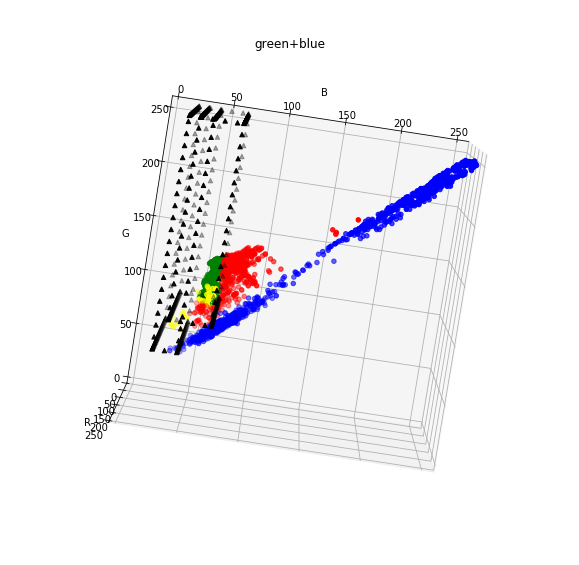

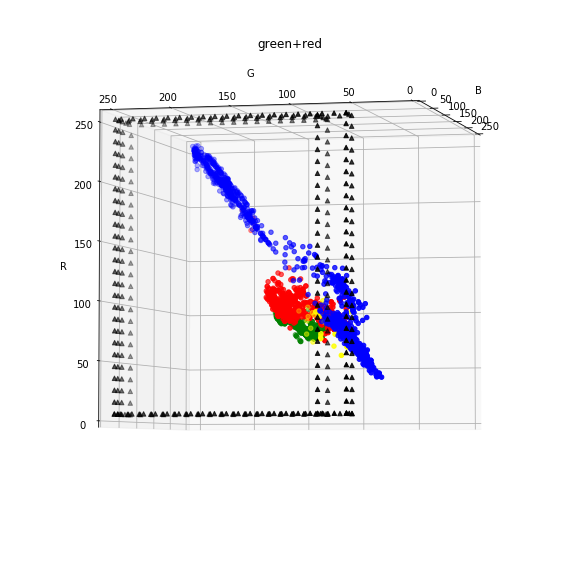

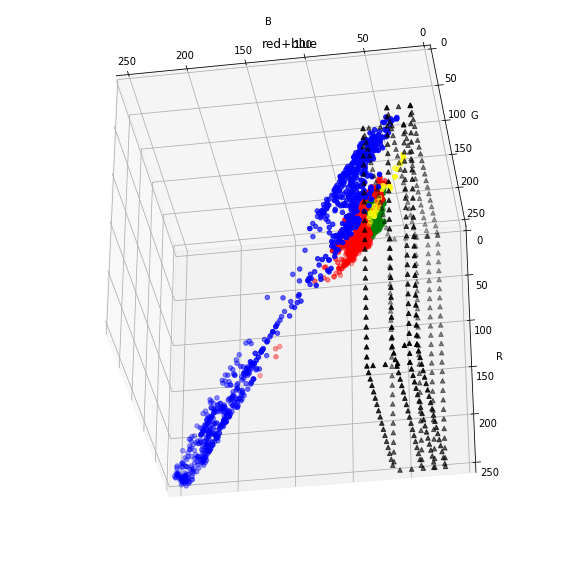

In [341]:
confusionPlotByViews(plotData2, threshes2, figsize = (10,10))

### Work a way to do MultiPlot (thus grid) with colorcubes
this issue is they appear too small... these hackish helper function will help you plot more than 1 column of colorcubes.

Here: we return a png figure from colorCube instead of plt.show() and then we find a way to add those like images to multiPlot grid. 

The big issue we're running up against is that matplotlib inline uses notebooks horizontal space as the max canvas width
and thus more than two figsize=(10,10) colorcubes fill that space, and start getting smaller and un-intelligible.

In [318]:
from modules.AnalysisHelpers import ( colorCube
                                    ,SubprocColorCube
                                    ,subprocColorCube
                                    ,multiPlot
                                    )

In [269]:
# ret = colorCube(confData = plotData2, b_save=True, figsize = (10, 10), spaceDefined={'x':[0,150],'y':[0,150],'z':[0,150]})

In [271]:
def bytesToPic(bPic):
    arr = np.asarray(bytearray(bPic), dtype=np.uint8)
    pic = cv2.imdecode(arr, 1)
    return pic

In [305]:
def biggerPic(img, figsize = (15,15)):
    
    # do imshow with a resize
    fig, ax = plt.subplots(1,1, figsize=figsize)
    _img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    ax.imshow(_img)
    
    #remove the black frame  / tick marks around the figure
    ax.tick_params(axis='x', colors=(0,0,0,0))
    ax.tick_params(axis='y', colors=(0,0,0,0))
    plt.box(False)
    
    plt.show()

In [306]:
def croppedPic(pic):
    deltaCrop = int( (float(1.9)/float(15.0)) * pic.shape[0]   )
    h,w = pic.shape[:2]
    pic_copy = pic.copy()
    crop = pic_copy[deltaCrop:h - deltaCrop,deltaCrop:w - deltaCrop ,:]
    return crop

In [347]:
subprocColorCube(confData = plotData2, spaceDefined={'x':[0,150],'y':[0,150],'z':[0,150]})

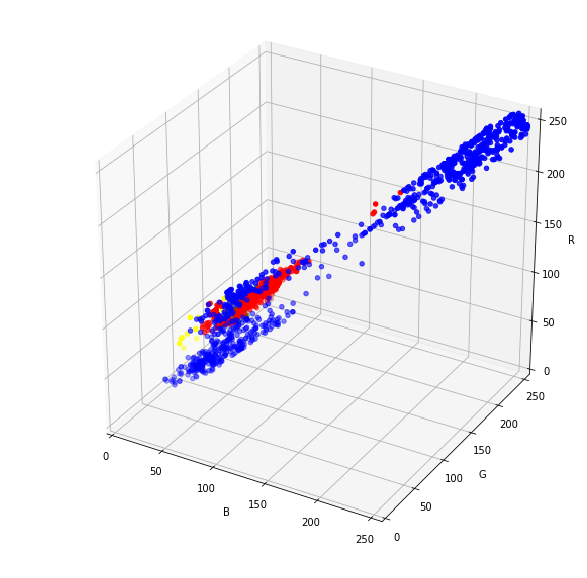

In [342]:
#Main method to Show large grpah in notebook
spaceDefined={'x':[0,150],'y':[0,150],'z':[0,150]}

ret = colorCube(confData = plotData2, b_save=True, figsize = (10, 10))

pic = bytesToPic(ret)
pic = croppedPic(pic)
biggerPic(pic,figsize = (10,10))

In [343]:
data = [[pic.copy(), pic.copy()], [pic.copy(), pic.copy()]]

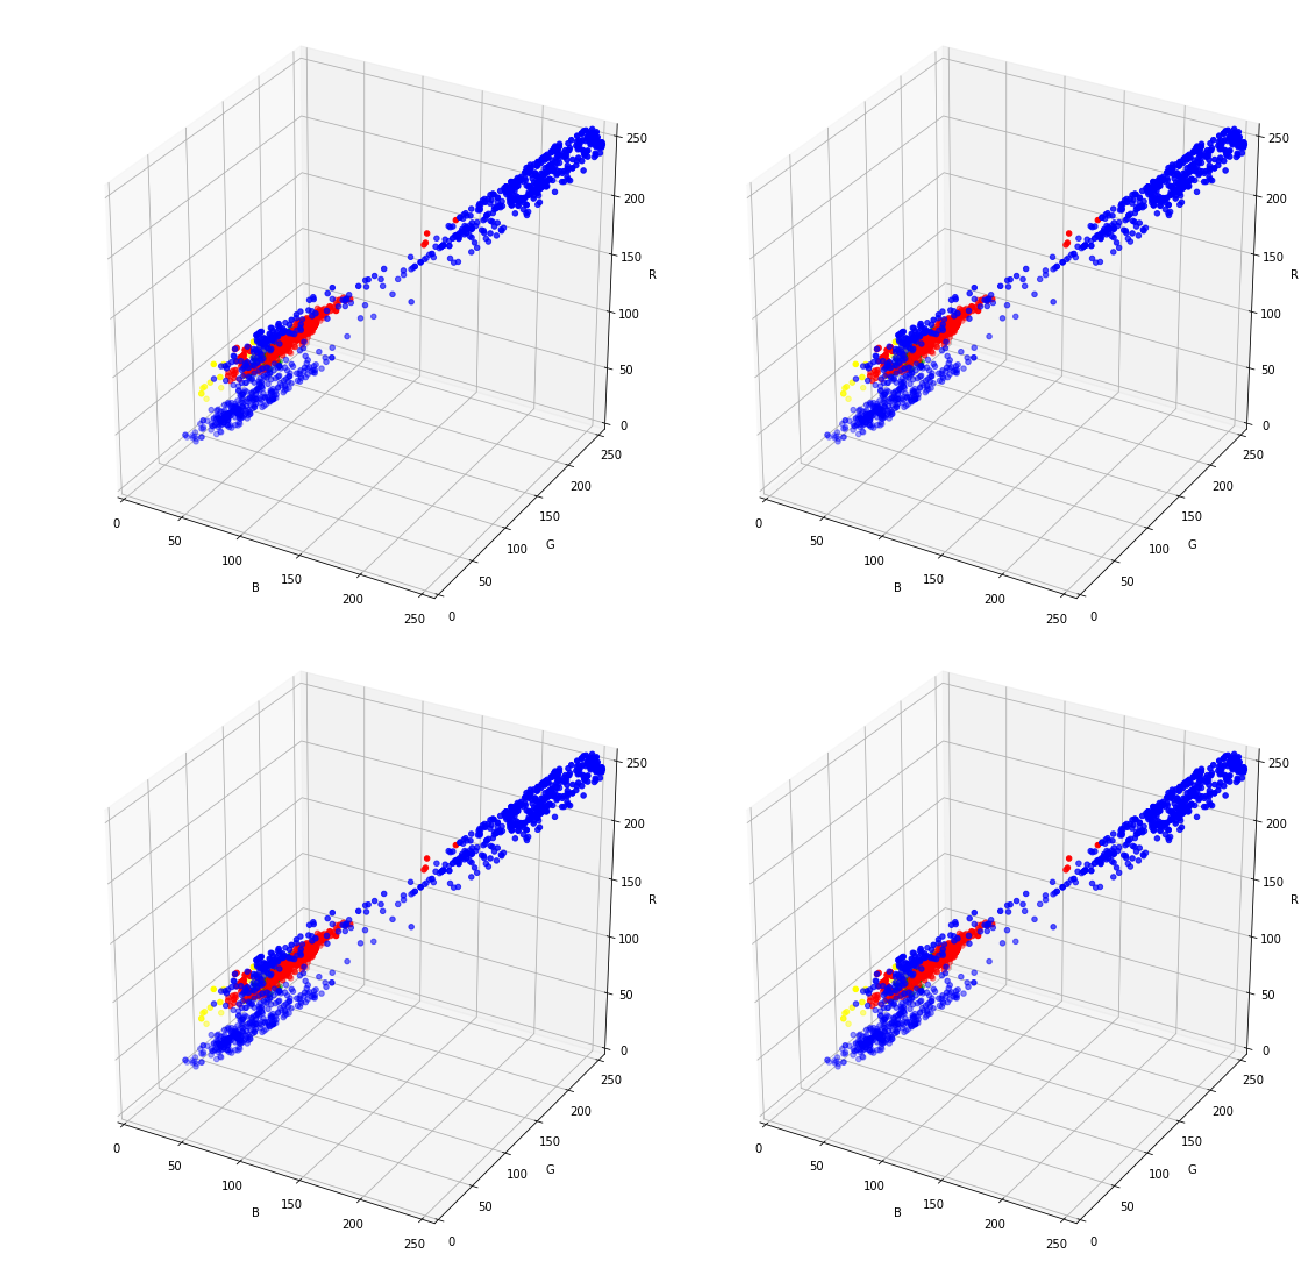

In [344]:
multiPlot(data, figsize = (23,23), hspace = 0, wspace = 0, bGrid=False)